In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ml_coursera.regression.logistic import LogisticRegression


In [2]:
df = pd.read_csv('ex2data1.txt', header=None)
df.columns = ['exam_1', 'exam_2', 'label']

In [3]:
df.head()

,exam_1,exam_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
reg = LogisticRegression(max_iter=10000, learning_rate=0.1)

In [5]:
# df[["exam_1", "exam_2"]] = reg.normalize_features(df[["exam_1", "exam_2"]])

In [6]:
df.head()

,exam_1,exam_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
x = df[["exam_1", "exam_2"]].to_numpy()
y = df.label.to_numpy()

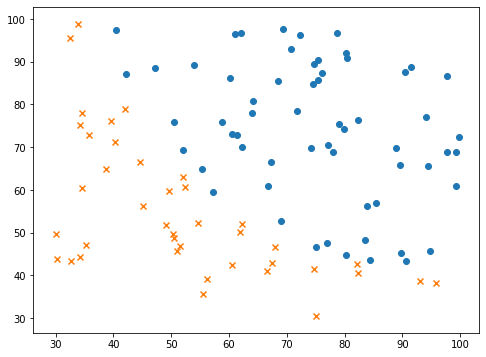

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df[df['label'] == 1], x='exam_1', y='exam_2', marker='o')
plt.scatter(data=df[df['label'] == 0], x='exam_1', y='exam_2', marker='x')

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.1, random_state=42)

/Users/diogomatoschaves/PycharmProjects/ml-coursera-python/ml_coursera/regression/logistic.py:78: RuntimeWarning: divide by zero encountered in log
  (1 - y).T @ np.log(1 - self._sigmoid(X @ theta)))
/Users/diogomatoschaves/PycharmProjects/ml-coursera-python/ml_coursera/regression/logistic.py:78: RuntimeWarning: invalid value encountered in matmul
  (1 - y).T @ np.log(1 - self._sigmoid(X @ theta)))


Updated learning rate: 71: 0.010000000000000002
Updated learning rate: 95: 0.0010000000000000002


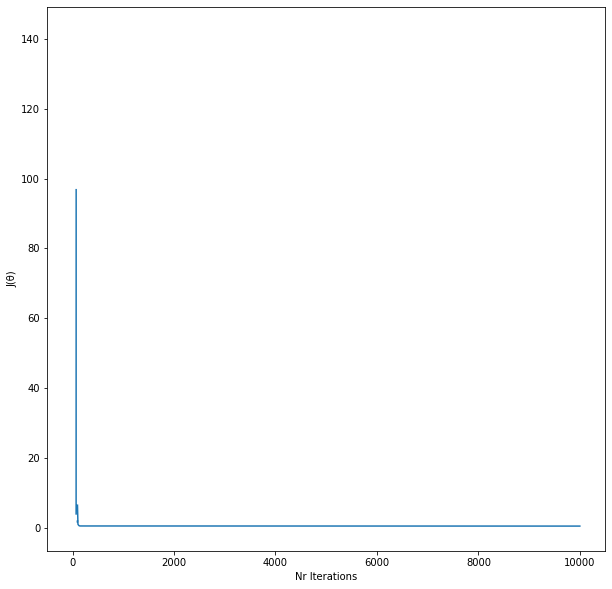

In [10]:
reg.fit(features_train, labels_train)

In [11]:
pred = reg.predict(features_train)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
reg.score(features_test, labels_test)

0.3

In [13]:
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
x2 = -(reg.coefficients[0] + reg.coefficients[1] * x1) / reg.coefficients[2]

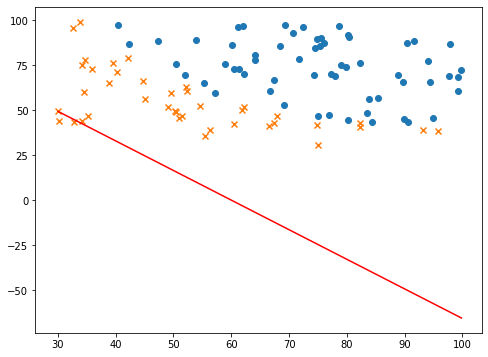

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df[df['label'] == 1], x='exam_1', y='exam_2', marker='o')
plt.scatter(data=df[df['label'] == 0], x='exam_1', y='exam_2', marker='x')

plt.plot(x1, x2, c='r')

In [15]:
reg.coefficients

array([-1.10802476,  0.01846321,  0.01120798])

In [16]:
reg.final_cost

0.5318833280385354